In [2]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn import metrics
import seaborn as sb

C:\Users\18704\AppData\Local\Temp\ipykernel_10456\3772395679.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [3]:
# get the csv being referenced
med = pd.read_csv('C:/research/homework/poet/poet/images/hw2/hw2/UMvC37.csv')
mvc = pd.DataFrame(med)
mvc.head(7)

,Year,January,February,March,April,May,June,July,August,September,October,November,December,Average Players,Gain or Loss
0,2017,0.3,1.8,430.0,192.4,120.9,103.3,105.4,92.6,67.8,38.0,39.5,55.1,103.925000,100
1,2018,54.4,33.0,28.9,34.4,42.6,44.8,47.1,31.5,31.8,31.7,30.9,31.6,36.891667,-10
2,2019,34.4,33.6,37.2,59.0,72.0,44.9,54.1,44.0,38.2,36.9,36.2,53.3,45.316667,1
3,2020,55.0,66.5,56.5,67.1,75.7,66.3,99.1,87.5,101.1,95.3,119.7,116.5,83.858333,10
4,2021,100.3,85.4,73.8,116.6,93.0,67.7,75.2,98.6,78.3,74.2,84.1,99.5,87.225000,1
5,2022,117.2,99.4,90.7,74.1,105.7,115.4,92.1,87.3,77.5,65.8,71.5,88.7,90.450000,1
6,2023,122.1,111.5,170.3,127.3,113.7,127.2,133.5,133.5,134.1,108.3,173.0,142.6,133.091667,10


In [4]:
mvc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Year             7 non-null      int64  
 1   January          7 non-null      float64
 2   February         7 non-null      float64
 3   March            7 non-null      float64
 4   April            7 non-null      float64
 5   May              7 non-null      float64
 6   June             7 non-null      float64
 7   July             7 non-null      float64
 8   August           7 non-null      float64
 9   September        7 non-null      float64
 10  October          7 non-null      float64
 11  November         7 non-null      float64
 12  December         7 non-null      float64
 13  Average Players  7 non-null      float64
 14  Gain or Loss     7 non-null      int64  
dtypes: float64(13), int64(2)
memory usage: 972.0 bytes


In [5]:
#make sure we have the right amount of columns and rows
mvc.shape

(7, 15)

In [6]:
mvc.describe()

,Year,January,February,March,April,May,June,July,August,September,October,November,December,Average Players,Gain or Loss
count,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000
mean,2020.000000,69.100000,61.600000,126.771429,95.842857,89.085714,81.371429,86.642857,82.142857,75.542857,64.314286,79.271429,83.900000,82.965476,16.142857
std,2.160247,45.549387,40.181463,141.709418,53.502675,27.511781,33.716352,30.237937,34.381723,35.264281,30.283297,52.089561,39.319079,33.083541,37.591792
min,2017.000000,0.300000,1.800000,28.900000,34.400000,42.600000,44.800000,47.100000,31.500000,31.800000,31.700000,30.900000,31.600000,36.891667,-10.000000
25%,2018.500000,44.400000,33.300000,46.850000,63.050000,73.850000,55.600000,64.650000,65.650000,53.000000,37.450000,37.850000,54.200000,64.587500,1.000000
50%,2020.000000,55.000000,66.500000,73.800000,74.100000,93.000000,67.700000,92.100000,87.500000,77.500000,65.800000,71.500000,88.700000,87.225000,1.000000
75%,2021.500000,108.750000,92.400000,130.500000,121.950000,109.700000,109.350000,102.250000,95.600000,89.700000,84.750000,101.900000,108.000000,97.187500,10.000000
max,2023.000000,122.100000,111.500000,430.000000,192.400000,120.900000,127.200000,133.500000,133.500000,134.100000,108.300000,173.000000,142.600000,133.091667,100.000000


In [7]:
mvc.shape

(7, 15)

In [8]:
mvc.corr()
# standard correlation to see relation

,Year,January,February,March,April,May,June,July,August,September,October,November,December,Average Players,Gain or Loss
Year,1.000000,0.943279,0.986346,-0.336951,-0.084069,0.352222,0.539342,0.498560,0.648284,0.722854,0.806081,0.784409,0.829812,0.551582,-0.508984
January,0.943279,1.000000,0.969145,-0.423593,-0.190614,0.199759,0.449953,0.318648,0.506201,0.559772,0.666404,0.640377,0.668274,0.406862,-0.613158
February,0.986346,0.969145,1.000000,-0.398730,-0.146078,0.269757,0.483440,0.446308,0.611245,0.699438,0.809773,0.769542,0.814020,0.502561,-0.564098
March,-0.336951,-0.423593,-0.398730,1.000000,0.915924,0.723853,0.559732,0.546335,0.422298,0.193922,-0.123181,-0.049769,-0.048118,0.563845,0.965362
April,-0.084069,-0.190614,-0.146078,0.915924,1.000000,0.842038,0.606024,0.638672,0.653949,0.392036,0.117169,0.165914,0.213037,0.726778,0.850168
May,0.352222,0.199759,0.269757,0.723853,0.842038,1.000000,0.873666,0.806072,0.824797,0.612885,0.375806,0.392497,0.491042,0.881638,0.606258
June,0.539342,0.449953,0.483440,0.559732,0.606024,0.873666,1.000000,0.873968,0.818922,0.717589,0.502716,0.552632,0.571529,0.896182,0.374770
July,0.498560,0.318648,0.446308,0.546335,0.638672,0.806072,0.873968,1.000000,0.922281,0.912961,0.733542,0.779455,0.774928,0.965006,0.414322
August,0.648284,0.506201,0.611245,0.422298,0.653949,0.824797,0.818922,0.922281,1.000000,0.929026,0.803165,0.813939,0.861212,0.978245,0.271155
September,0.722854,0.559772,0.699438,0.193922,0.392036,0.612885,0.717589,0.912961,0.929026,1.000000,0.944495,0.957417,0.958766,0.891926,0.059299


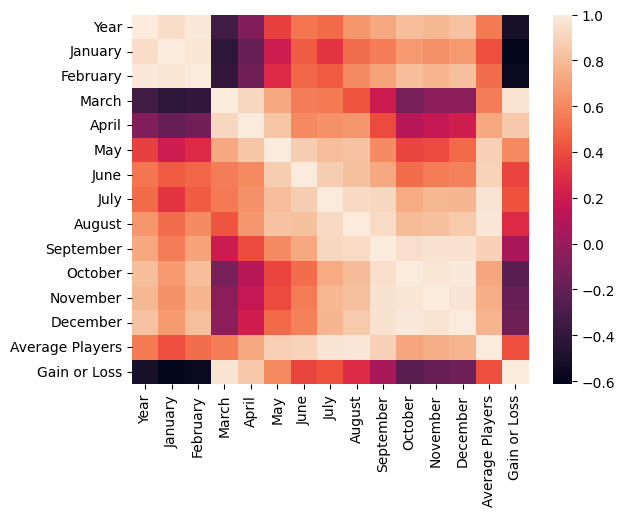

In [9]:
#show the heatmap of the correlation between the variables to better visualize what is strongest.
sb.heatmap(mvc.corr(numeric_only=True))
X= mvc.iloc[:,1:14]
Y= mvc.iloc[:,-1]
column_list = mvc.loc[:, mvc.columns]

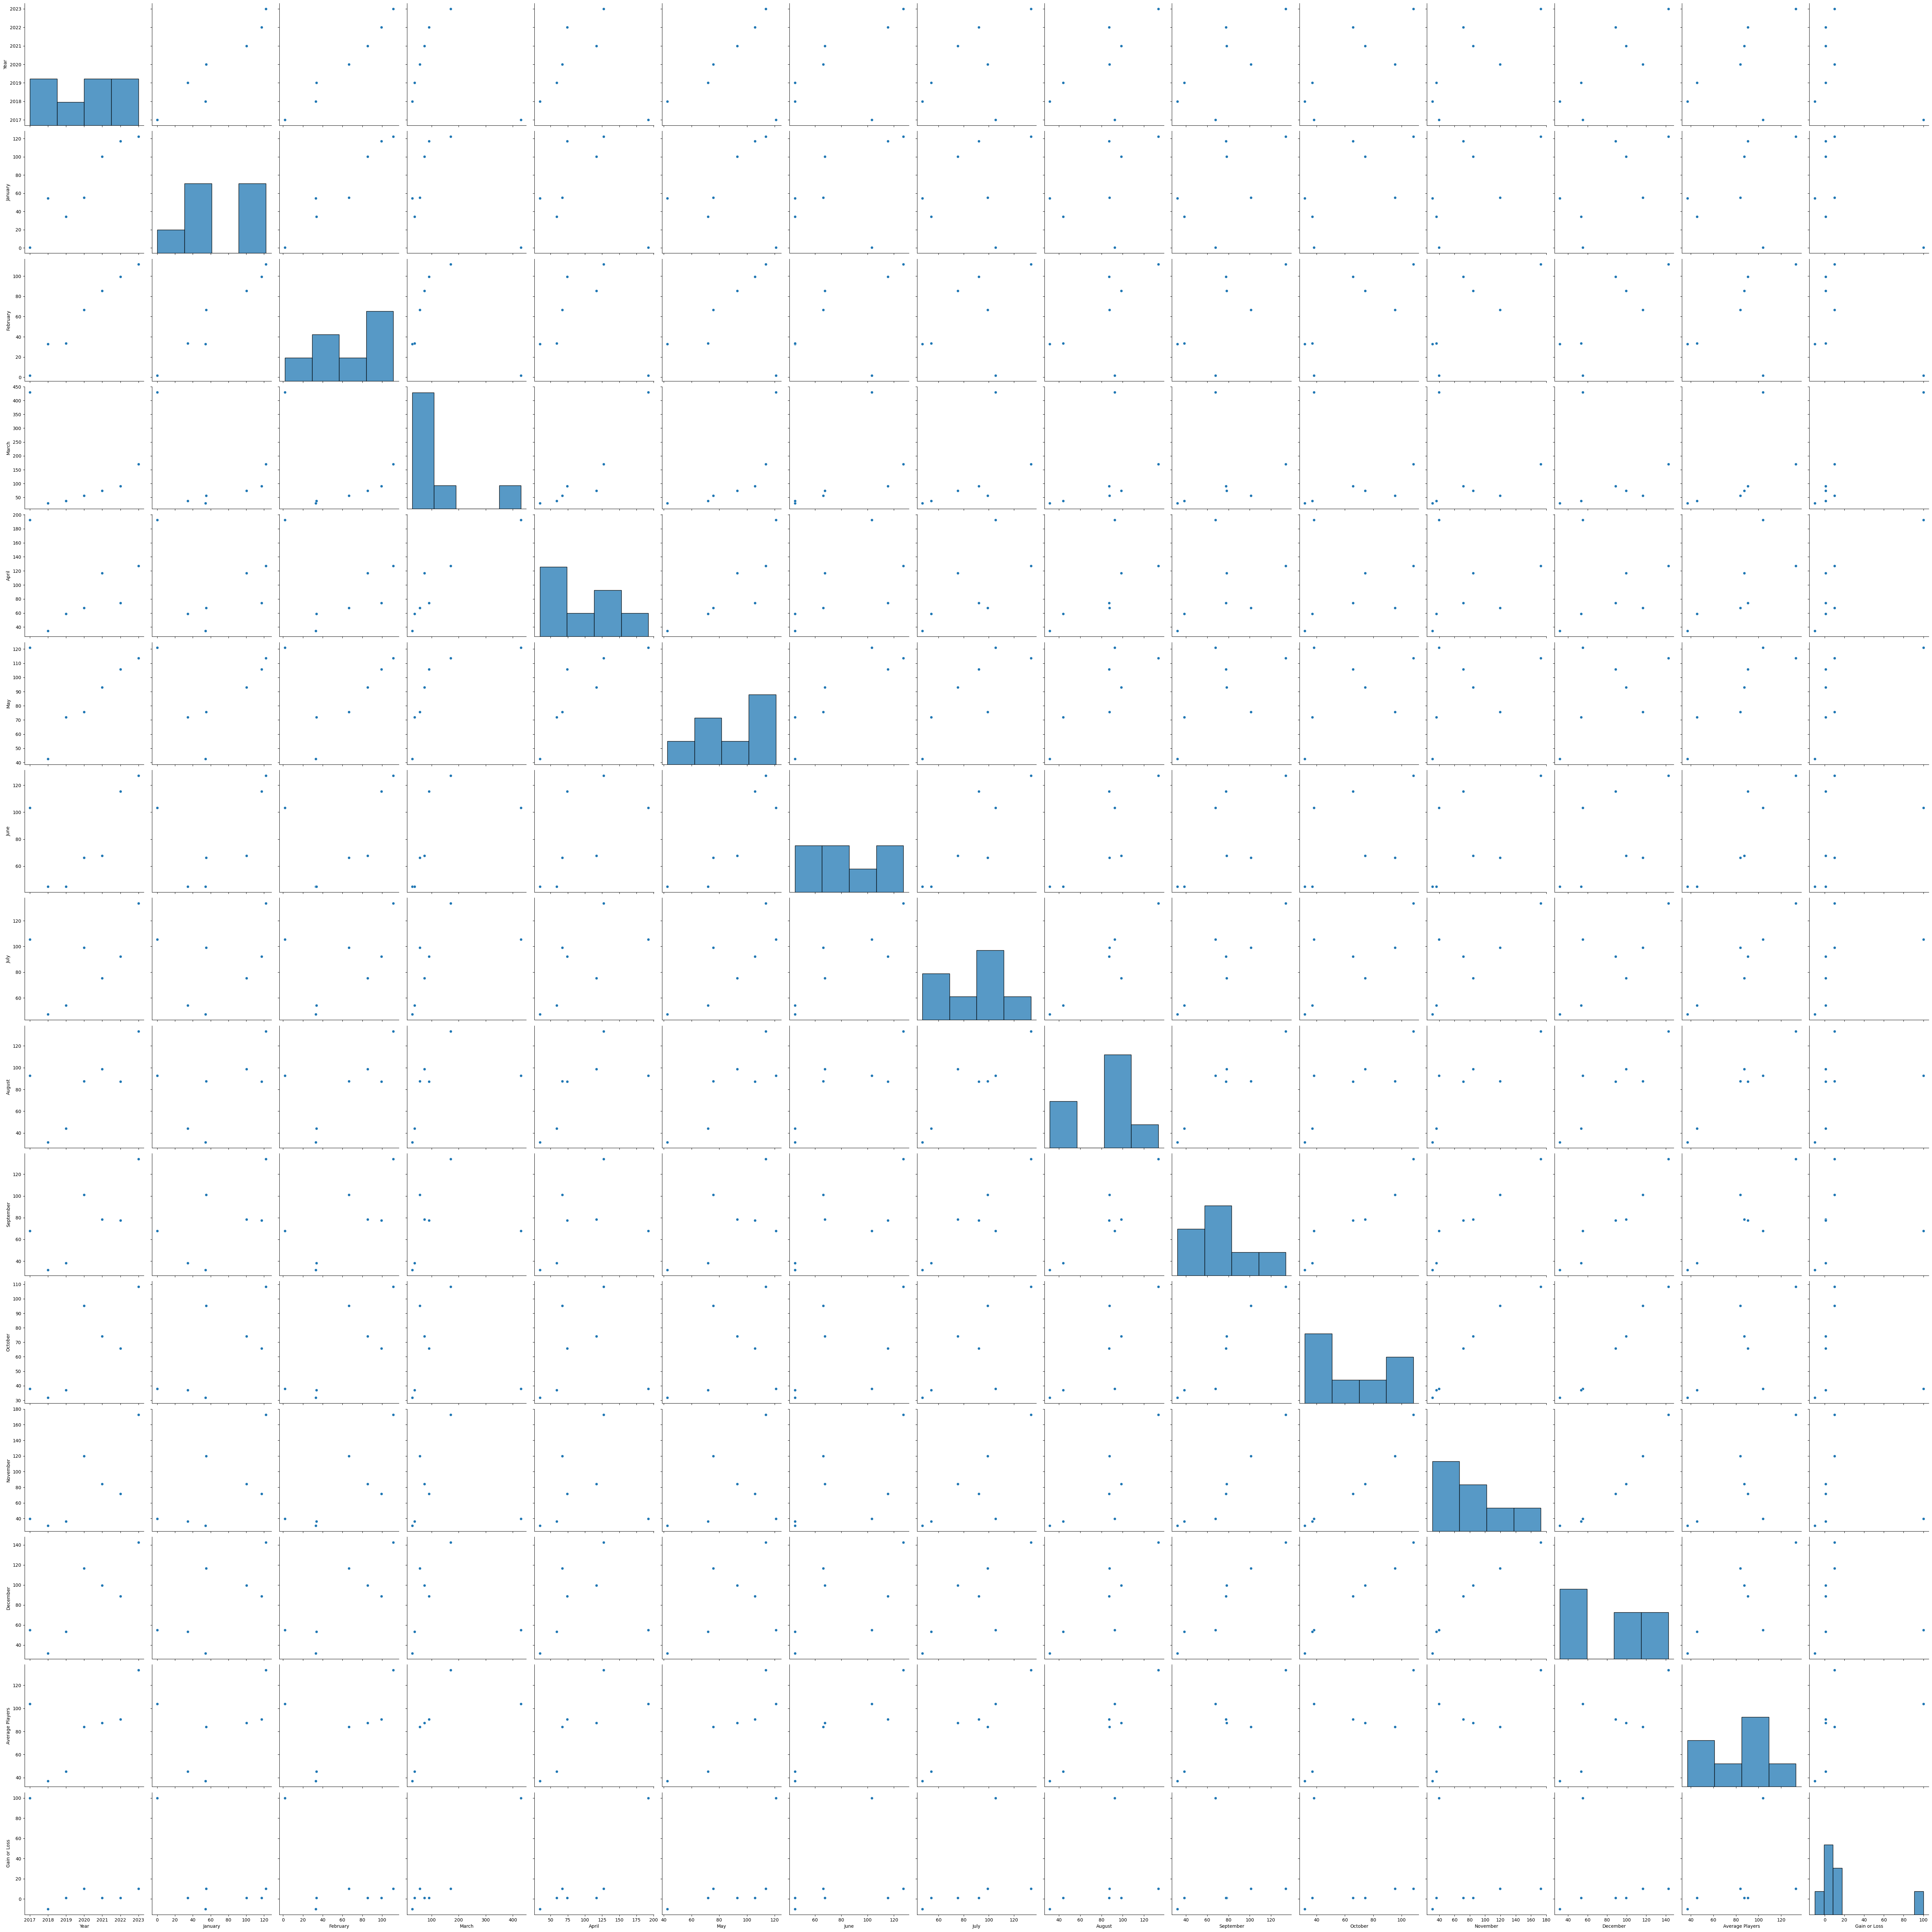

In [10]:
sb.pairplot(column_list, height = 4, diag_kind= "hist")
#histogram to also see potential relations

In [11]:
best_features= SelectKBest(score_func=chi2, k=5)
fitness = best_features.fit(X,Y)

In [12]:
mvc_scores= pd.DataFrame(fitness.scores_)
mvc_columns= pd.DataFrame(X.columns)

In [13]:
features_scores= pd.concat([mvc_columns, mvc_scores], axis=1)
features_scores.columns= ['Features', 'Score']
features_scores.sort_values(by = 'Score')

,Features,Score
5,June,29.222656
4,May,36.370162
6,July,48.121418
12,Average Players,49.264525
7,August,53.241032
9,October,72.336680
8,September,77.649571
0,January,92.173493
11,December,92.577533
1,February,101.815584


In [14]:
Xm = mvc[['December','February', 'April', 'November', 'March']]
Ym = mvc[['Gain or Loss']]
#many columns for more data

In [15]:
X_train,X_test,y_train,y_test=train_test_split(Xm,Ym,test_size=0.5,random_state=200)

In [16]:
logreg= LogisticRegression()
logreg.fit(X_train, y_train)

c:\Users\18704\AppData\Local\pypoetry\Cache\virtualenvs\hw2-CqRct5pP-py3.12\Lib\site-packages\sklearn\utils\validation.py:1229: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\18704\AppData\Local\pypoetry\Cache\virtualenvs\hw2-CqRct5pP-py3.12\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [17]:
y_pred=logreg.predict(X_test)
print (X_test) #test dataset
print (y_pred) #predicted values

   December  February  April  November  March
3     116.5      66.5   67.1     119.7   56.5
5      88.7      99.4   74.1      71.5   90.7
6     142.6     111.5  127.3     173.0  170.3
4      99.5      85.4  116.6      84.1   73.8
[1 1 1 1]


In [18]:
print('Accuracy: ',metrics.accuracy_score(y_test, y_pred))
print('Recall: ',metrics.recall_score(y_test, y_pred, zero_division=1))
print('Precision: ',metrics.precision_score(y_test, y_pred, zero_division=1))
#after testing it, give a score for accuracy

Accuracy:  0.5
Recall:  1.0
Precision:  0.5
